In [91]:
import pandas as pd
import numpy as np
import urllib
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from scipy.stats import zscore
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [92]:
data = pd.read_csv("wrCombine.csv")

In [93]:
data.describe()

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good
count,403.000000,403.000000,393.000000,283.000000,315.000000,310.000000,258.000000,251.000000,403.000000
mean,72.813896,202.444169,4.516921,14.296820,35.161905,120.577419,4.233721,6.926693,0.133995
std,2.321778,15.217617,0.098047,4.044551,3.158621,5.821965,0.167048,0.211192,0.341070
min,65.000000,156.000000,4.210000,4.000000,24.500000,102.000000,3.810000,6.420000,0.000000
25%,71.000000,192.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,73.000000,203.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,74.000000,212.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,78.000000,255.000000,4.850000,27.000000,45.000000,139.000000,5.010000,7.930000,1.000000


## EDA

All of my data comes from the NFL combine. The NFL combine is a measurement event where the best college players participate in a series of timed events and drills. Therefore, all of my variables are quantitative.

#### Height

In [94]:
data[data.Height.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good


There are no missing values for Height.

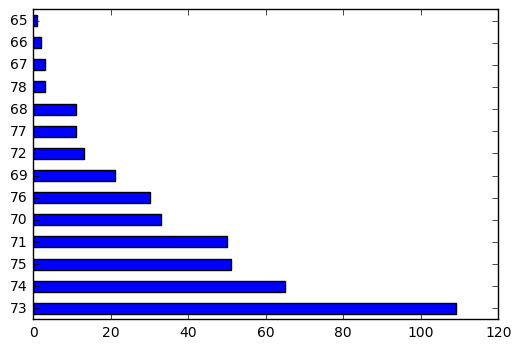

In [95]:
data.Height.value_counts().plot('barh')

The most common heights by far are just above 6 ft tall. This makes sense to me as most of the successful NFL wide receivers are in this same height range as well. Tall recievers with quickness and speed are the perfect combination. 

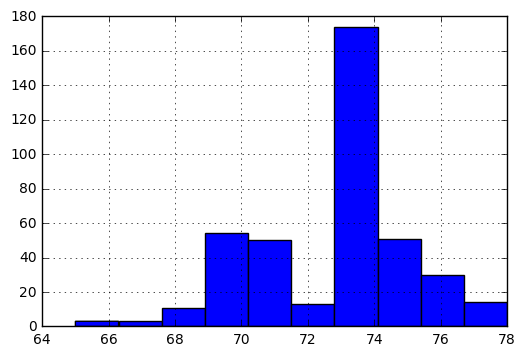

In [96]:
data.Height.hist()

This histogram somewhat represents a bell curve which checks out when it comes to heights.

#### Weight

In [97]:
data[data.Weight.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good


There are no null values for weight. To be expected as skipping the weigh in at the NFL combine would provide no benefit to a participant and can still be done if the athlete is injured.

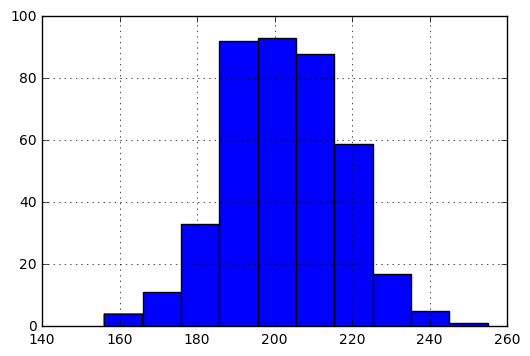

In [98]:
data.Weight.hist()

Similarly to height, the weight histogram should also look like a bell curve. An average height of 6'1" and around 200 pounds is pretty standard for an NFL wide receiver.

#### 40 Yard Dash

In [99]:
data[data.Yard.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good
5,74,222,NaN,19.0,NaN,NaN,4.29,7.07,0
10,75,209,NaN,NaN,NaN,NaN,4.28,NaN,0
31,71,199,NaN,18.0,43.5,133.0,NaN,NaN,0
37,73,216,NaN,8.0,26.5,112.0,4.28,7.22,0
55,74,194,NaN,NaN,NaN,NaN,NaN,NaN,0
59,70,194,NaN,17.0,40.5,129.0,NaN,NaN,0
60,71,203,NaN,15.0,31.0,115.0,NaN,NaN,0
74,69,201,NaN,17.0,NaN,NaN,NaN,NaN,0
85,72,199,NaN,17.0,32.5,116.0,NaN,NaN,0
91,74,221,NaN,12.0,33.0,117.0,NaN,NaN,0


Unfortunately, there were a few participants who didn't run the 40 yard dash. This can be explained by a couple of reasons. Injury would prevent an athelete from participating in a couple of the timed events. Row 31 is a textbook example of an athelete suffering a training injury, perhaps a pulled hamgstring during training. Participant 31 only did the non-running events which would indicate an injury. A different reason would be performance. Players who have great college seasons and can only hurt themselves by running a slow 40 yard dash will often skip the event. Player 55 is a great example of skipping the combine on performance. As a taller receiver skipping the timed speed events is expected since taller recievers don't excel in that part of the game.

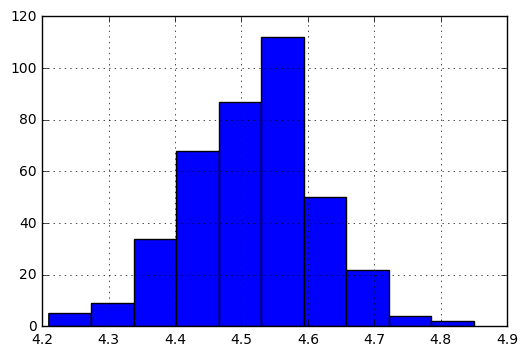

In [100]:
data.Yard.hist()

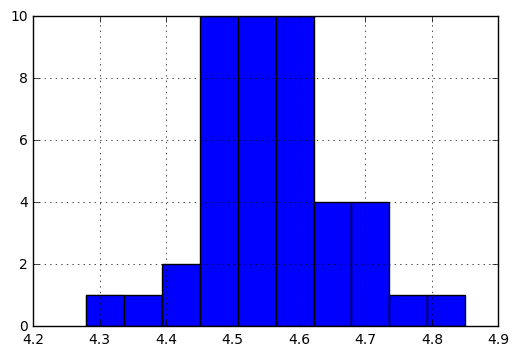

In [101]:
data[data.Height > 75].Yard.hist()

Height and 40 yard dash time are usually inversely related. As the above histogram shows, only 4 players above the height of 6'3" have run sub 4.45 40 yard dash times. These rare combinations of speed and height are greatly sought after and often lead to general managers overlooking over flaws for their pure physical potential. However, this inverse relationship isn't shown very strongly in this histogram because the taller slower receivers will self time during their training and will opt out of the event, as I previously explained.

#### Bench

In [102]:
data[data.Bench.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good
10,75,209,NaN,NaN,NaN,NaN,4.28,NaN,0
13,73,202,4.57,NaN,30.5,116.0,4.54,7.29,0
22,76,221,4.53,NaN,NaN,NaN,NaN,NaN,0
23,76,221,4.58,NaN,37.5,119.0,4.15,6.95,0
25,74,204,4.62,NaN,31.0,116.0,4.12,6.75,0
34,72,193,4.42,NaN,36.5,129.0,NaN,6.77,0
35,75,194,4.52,NaN,37.0,124.0,4.46,6.83,0
39,71,188,4.22,NaN,37.0,133.0,4.33,NaN,0
45,75,195,4.51,NaN,36.0,130.0,4.14,NaN,0
46,71,204,4.49,NaN,34.0,124.0,4.21,NaN,0


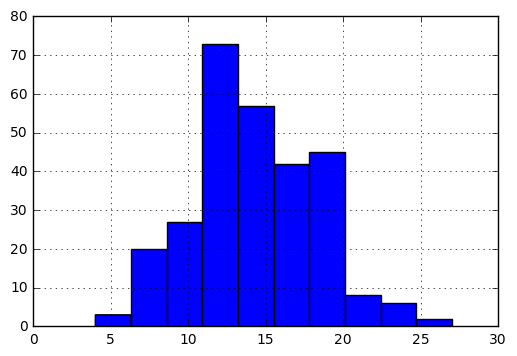

In [103]:
data.Bench.hist()

Most atheletic timed events will have a similar bell curve. Bench press is no different.

#### Vert

In [104]:
data[data.Vert.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good
5,74,222,NaN,19.0,NaN,NaN,4.29,7.07,0
10,75,209,NaN,NaN,NaN,NaN,4.28,NaN,0
19,73,212,4.64,16.0,NaN,NaN,4.28,NaN,0
22,76,221,4.53,NaN,NaN,NaN,NaN,NaN,0
55,74,194,NaN,NaN,NaN,NaN,NaN,NaN,0
74,69,201,NaN,17.0,NaN,NaN,NaN,NaN,0
94,73,198,4.42,12.0,NaN,NaN,NaN,NaN,0
96,73,187,4.53,13.0,NaN,NaN,NaN,NaN,0
97,73,195,4.56,NaN,NaN,NaN,NaN,NaN,0
99,74,202,4.59,NaN,NaN,NaN,NaN,NaN,0


Skipping a key event for wide receivers is always puzzling. The only explanation I can think of is similar to players that skipped the forty yard dash. If they expected to perform poorly in the vertical jump then performing it at the combine can only hurt their draft stock.

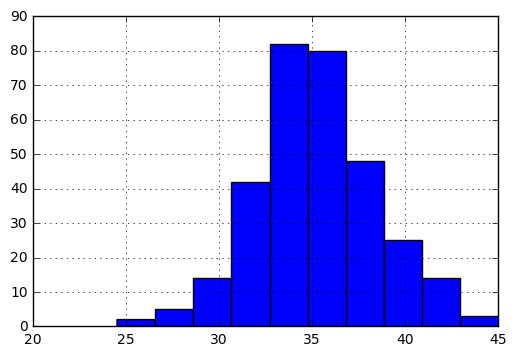

In [105]:
data.Vert.hist()

#### Broad

In [106]:
data[data.Broad.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good
5,74,222,NaN,19.0,NaN,NaN,4.29,7.07,0
10,75,209,NaN,NaN,NaN,NaN,4.28,NaN,0
19,73,212,4.64,16.0,NaN,NaN,4.28,NaN,0
22,76,221,4.53,NaN,NaN,NaN,NaN,NaN,0
55,74,194,NaN,NaN,NaN,NaN,NaN,NaN,0
69,74,209,4.65,9.0,33.5,NaN,4.14,6.99,0
74,69,201,NaN,17.0,NaN,NaN,NaN,NaN,0
94,73,198,4.42,12.0,NaN,NaN,NaN,NaN,0
96,73,187,4.53,13.0,NaN,NaN,NaN,NaN,0
97,73,195,4.56,NaN,NaN,NaN,NaN,NaN,0


The broadjump is not as important as a test as the 40 yard dash or the vertical jump. Therefore, players skipping it is less important as not too much stock is placed in the event. This explains most of these missing values since most of these players ran the 40, a much more important event. This would indicate They haven't trained or put in the effort to improve their broad jump.

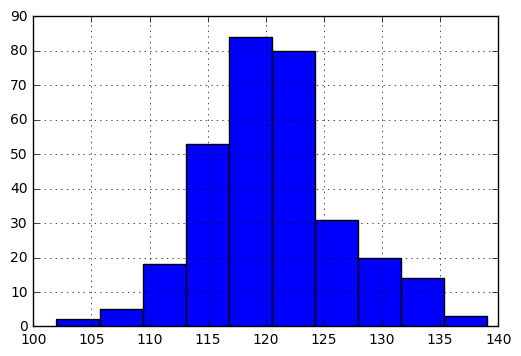

In [107]:
data.Broad.hist()

#### Shuffle

In [108]:
data[data.Shuttle.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good
1,75,197,4.42,8.0,34.5,123.0,NaN,6.73,0
15,73,194,4.61,14.0,35.5,127.0,NaN,6.94,0
17,76,218,4.50,18.0,35.5,120.0,NaN,7.00,0
20,71,199,4.46,13.0,36.0,131.0,NaN,7.18,0
21,75,222,4.56,13.0,36.5,124.0,NaN,6.74,0
22,76,221,4.53,NaN,NaN,NaN,NaN,NaN,0
29,71,189,4.56,11.0,29.5,117.0,NaN,7.01,0
31,71,199,NaN,18.0,43.5,133.0,NaN,NaN,0
32,74,219,4.55,14.0,36.0,126.0,NaN,7.11,0
34,72,193,4.42,NaN,36.5,129.0,NaN,6.77,0


Similar to my broad jump explanation, the shuttle is also a 2nd tier events for wide receivers. It indicates agility and quickness which are important but generally not as important in the draft process as a fast 40 time. I'm interested to see if it proves valuable to determine good receivers as the slot receiver position, a position that depends on quickness more than speed, has been up and coming in recent years.

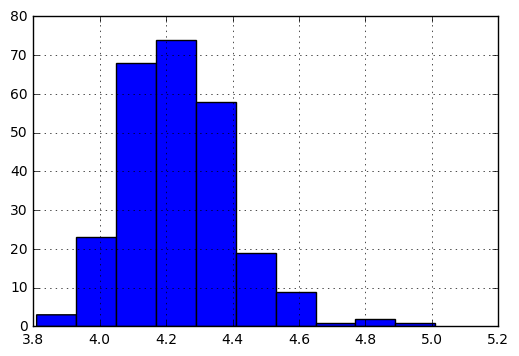

In [109]:
data.Shuttle.hist()

#### 3 Cone

In [110]:
data[data.Cone.isnull()]

,Height,Weight,Yard,Bench,Vert,Broad,Shuttle,Cone,Good
4,76,255,4.70,23.0,29.0,118.0,4.14,NaN,0
6,71,182,4.41,13.0,37.0,119.0,4.20,NaN,0
8,72,195,4.45,10.0,34.0,122.0,4.39,NaN,0
9,74,214,4.45,17.0,36.0,124.0,4.26,NaN,0
10,75,209,NaN,NaN,NaN,NaN,4.28,NaN,0
19,73,212,4.64,16.0,NaN,NaN,4.28,NaN,0
22,76,221,4.53,NaN,NaN,NaN,NaN,NaN,0
31,71,199,NaN,18.0,43.5,133.0,NaN,NaN,0
39,71,188,4.22,NaN,37.0,133.0,4.33,NaN,0
44,73,215,4.54,15.0,32.5,120.0,5.01,NaN,0


This event measures the same attributes as the shuttle does. Quickness and agility. A lot of players will skip this event as it isn't highly regarded, will take away from their time to train for more important events and can only hurt them if they perform badly.

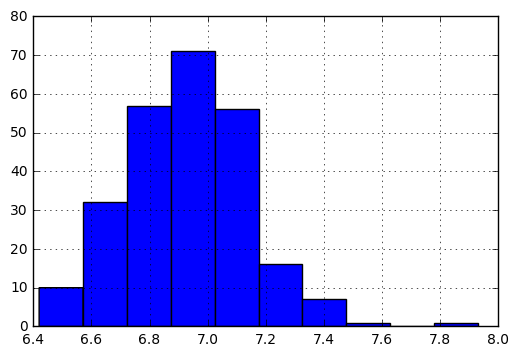

In [111]:
data.Cone.hist()

In [112]:
data = data.fillna(data.mean())

In [113]:
good = data.pop('Good')

In [120]:
test = data.iloc[:51, :]
train = data.iloc[51:, :]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(data, good, test_size =.5,random_state=42)

In [165]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [166]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [167]:
best_rfc = estimator.best_estimator_

In [168]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

('AUC Score: ', 0.65785319652722962)


In [150]:
predictions = best_rfc.predict_proba(test)[:,1]

In [152]:
ids = []

for i in range(predictions.size):
    ids.append(i+1)

In [153]:
a = np.array(ids)
b = np.array(predictions)
df = pd.DataFrame({"id": a, "y": b})
csv = df.to_csv("wideReceiverPred.csv", index=True)